In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [4]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv('/content/abalone.data', names=column_names, index_col=False)

In [5]:
df.shape

(4177, 9)

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
onehot_encoder = OneHotEncoder()
sex_encoded = onehot_encoder.fit_transform(df[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['Sex']))
df_encoded = pd.concat([df.drop(columns=['Sex']), sex_encoded_df], axis=1)

In [10]:
X = df_encoded.drop('Rings', axis = 1)
y = df_encoded['Rings']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model=Sequential()
model.add(Dense(24, activation="relu", input_dim= X_train_scaled.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3,activation="linear"))

In [39]:
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mae'])

In [40]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 100)

Epoch 1/100
105/105 [==============================] - 3s 9ms/step - loss: 92.9719 - mae: 9.0427 - val_loss: 55.0132 - val_mae: 6.6230
Epoch 2/100
105/105 [==============================] - 1s 5ms/step - loss: 39.3168 - mae: 4.9362 - val_loss: 19.0952 - val_mae: 3.3812
Epoch 3/100
105/105 [==============================] - 1s 6ms/step - loss: 27.1738 - mae: 3.7929 - val_loss: 10.7549 - val_mae: 2.3112
Epoch 4/100
105/105 [==============================] - 1s 7ms/step - loss: 22.3925 - mae: 3.4008 - val_loss: 6.8875 - val_mae: 1.7491
Epoch 5/100
105/105 [==============================] - 1s 10ms/step - loss: 18.0899 - mae: 3.1601 - val_loss: 6.5443 - val_mae: 1.7190
Epoch 6/100
105/105 [==============================] - 1s 9ms/step - loss: 16.5424 - mae: 2.9971 - val_loss: 6.1696 - val_mae: 1.6626
Epoch 7/100
105/105 [==============================] - 1s 10ms/step - loss: 14.0932 - mae: 2.8579 - val_loss: 6.0084 - val_mae: 1.6466
Epoch 8/100
105/105 [==============================] - 1s

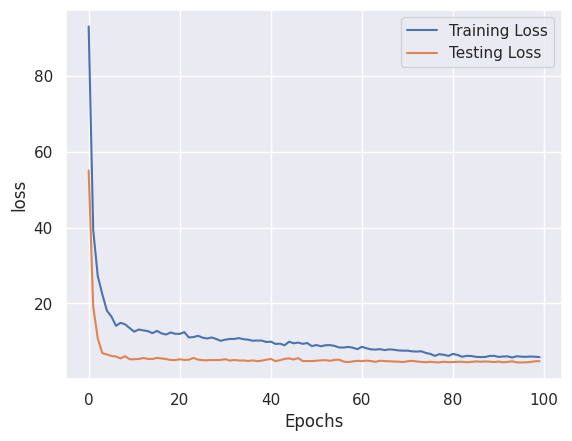

In [41]:
sns.set(style="darkgrid")
sns.lineplot(history.history['loss'], label='Training Loss')
sns.lineplot(history.history['val_loss'], label='Testing Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [42]:
# Evaluate the model on the testing set
loss_test, mse_test = model.evaluate(X_test, y_test, verbose=0)
print('Testing Loss: %.2f' % loss_test)
print('Mean Squared Error (MSE) on Testing Data: %.2f' % mse_test)

# Evaluate the model on the training set
loss_train, mse_train = model.evaluate(X_train, y_train, verbose=0)
print("*" * 30)
print('Training Loss: %.2f' % loss_train)
print('Mean Squared Error (MSE) on Training Data: %.2f' % mse_train)

Testing Loss: 11.18
Mean Squared Error (MSE) on Testing Data: 2.91
******************************
Training Loss: 10.68
Mean Squared Error (MSE) on Training Data: 2.83
